Tamanho Imagem: X: 328    Y: 321
Tamanho Frame: X: 639     Y: 479


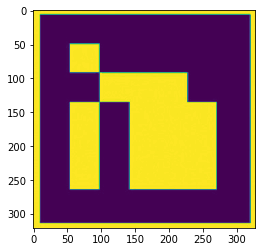

In [2]:
import cv2
import numpy as np
import math
from matplotlib import pyplot as plt

img = cv2.imread('alvo.jpg',0)

cv2.imshow('image',img)
imgplot = plt.imshow(img)


  
  
# capture frames from a camera 
cap = cv2.VideoCapture('entrada.avi') 
#pega dimensões do alvo e do frame
tamXimg=img.shape[1]
tamYimg=img.shape[0]
witdh = cap.get(3)  # float
height = cap.get(4) # float
rows=math.floor(witdh) #transforma em int
cols=math.floor(height) #transforma em int
rows=rows-1
cols=cols-1
# loop runs if capturing has been initialized 
while(1): 
  
    # reads frames from a camera 
    ret, frame = cap.read() 
  
    # converting BGR to HSV 
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY) 
    gray = np.float32(gray)  
    # define range of red color in HSV 
    lower_red = np.array([30,150,50]) 
    upper_red = np.array([255,255,180]) 
      
    # create a red HSV colour boundary and  
    # threshold HSV image 
    mask = cv2.inRange(hsv, lower_red, upper_red) 
    dst = cv2.cornerHarris(gray,2,3,0.04)
    # Bitwise-AND mask and original image 
    res = cv2.bitwise_and(frame,frame, mask= mask) 
  
    # Display an original image 
    #cv2.imshow('Original',frame) 
  
    # finds edges in the input image image and 
    # marks them in the output map edges 
    edges = cv2.Canny(frame,100,200,300)
    frame[dst>0.01*dst.max()]=[0,0,255] 
    CornersEdges=np.array([[]])
    
    #varre o frame procurando por bordas
    for i in range(rows):
        for j in range(cols):
            if  np.array_equal([0,0,255],frame[j,i]) and np.array_equal(255,edges[j,i]): 
                CornersEdges = np.append(CornersEdges, [i,j])
                
    # Display edges in a frame 
    cv2.imshow('Edges',edges) 
    cv2.imshow('Corners', frame)	
    # Wait for Esc key to stop 
    k = cv2.waitKey(5) & 0xFF
    if k == 27: 
        break
    CornersEdges = np.delete(CornersEdges, 0, axis=0)

  
# Close the window 
cap.release() 
  
# De-allocate any associated memory usage 
cv2.destroyAllWindows() 

print('Tamanho Imagem: X:',tamXimg,'   Y:',tamYimg)
print('Tamanho Frame: X:',rows,'    Y:',cols)


In [3]:
print(CornersEdges.shape[0])

2056
